In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from matplotlib import rc

# Windows 예제
rc('font', family='Malgun Gothic')  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [12]:
# 데이터 로드
df = pd.read_csv('reverse1999_reviews.csv', encoding='utf-8-sig')

In [13]:
# 날짜 변환 및 추가 컬럼 생성
df['at'] = pd.to_datetime(df['at'])
df['review_length'] = df['content'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
df['sentiment'] = df['score'].apply(lambda x: '긍정' if x >= 4 else ('보통' if x == 3 else '부정'))

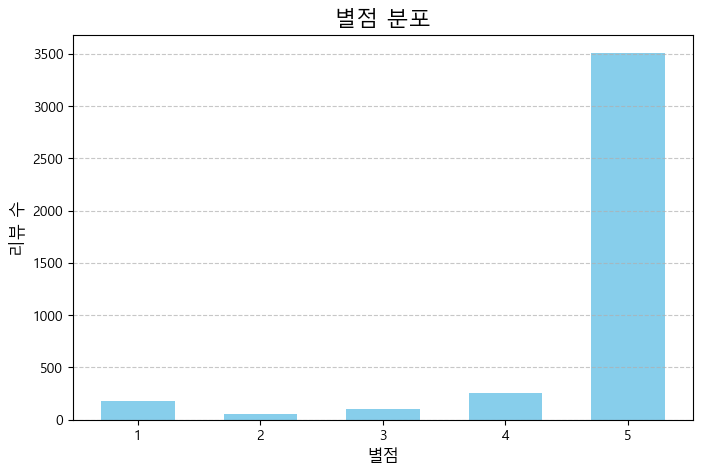

In [14]:
# 1. 별점 분포 - 막대그래프
plt.figure(figsize=(8, 5))
score_counts = df['score'].value_counts().sort_index()
plt.bar(score_counts.index, score_counts.values, color='skyblue', width=0.6)
plt.title('별점 분포', fontsize=16)
plt.xlabel('별점', fontsize=12)
plt.ylabel('리뷰 수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(score_counts.index)
plt.show()

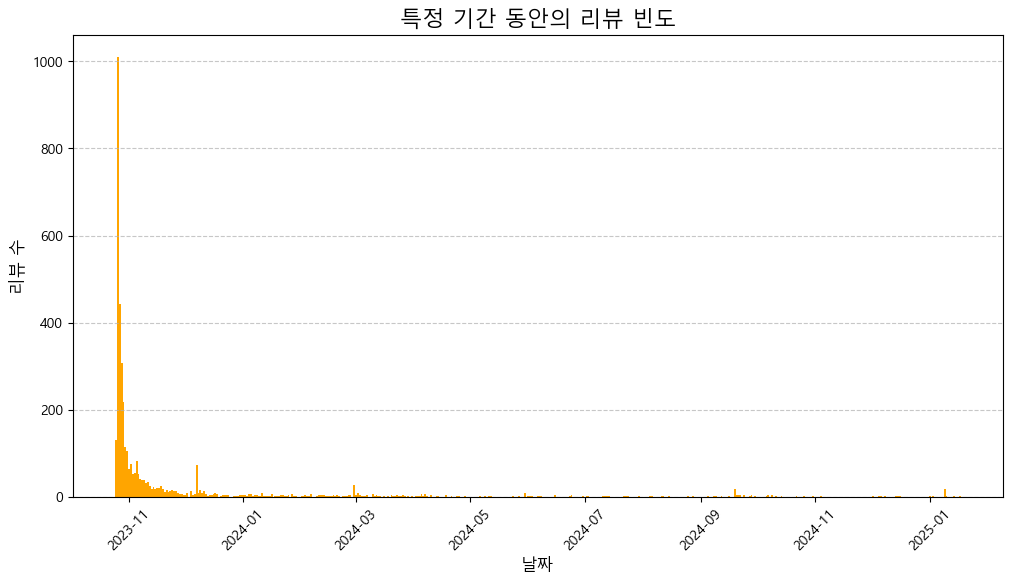

In [15]:
# 2. 특정 기간 동안의 리뷰 빈도 - 히스토그램
plt.figure(figsize=(12, 6))
review_by_date = df['at'].dt.date.value_counts().sort_index()
plt.bar(review_by_date.index, review_by_date.values, color='orange', width=1)
plt.title('특정 기간 동안의 리뷰 빈도', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('리뷰 수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

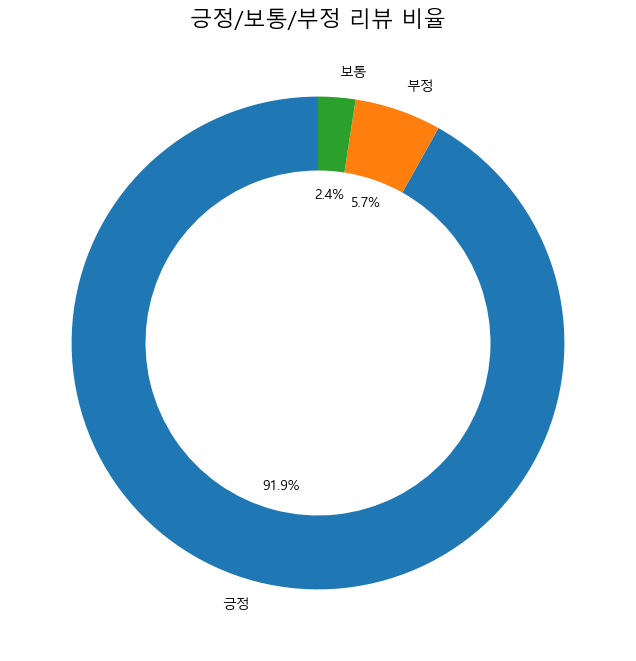

In [16]:
# 3. 긍정/보통/부정 비율 - 도넛 차트
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=0.3))
plt.title('긍정/보통/부정 리뷰 비율', fontsize=16)
plt.show()

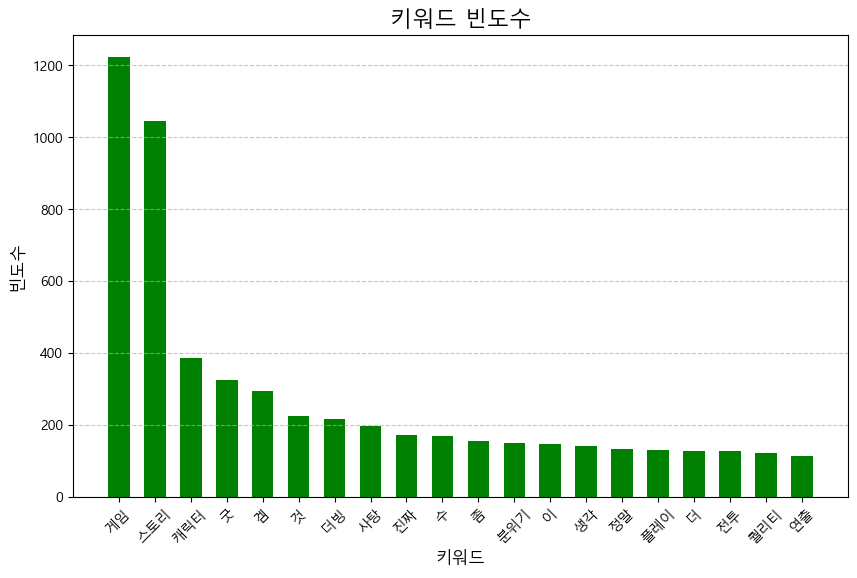

In [17]:
# 4. 키워드 빈도수 - 막대그래프
okt = Okt()
all_nouns = []
df['content'].dropna().apply(lambda x: all_nouns.extend(okt.nouns(x)))
word_freq = Counter(all_nouns).most_common(20)
words, counts = zip(*word_freq)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='green', width=0.6)
plt.title('키워드 빈도수', fontsize=16)
plt.xlabel('키워드', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

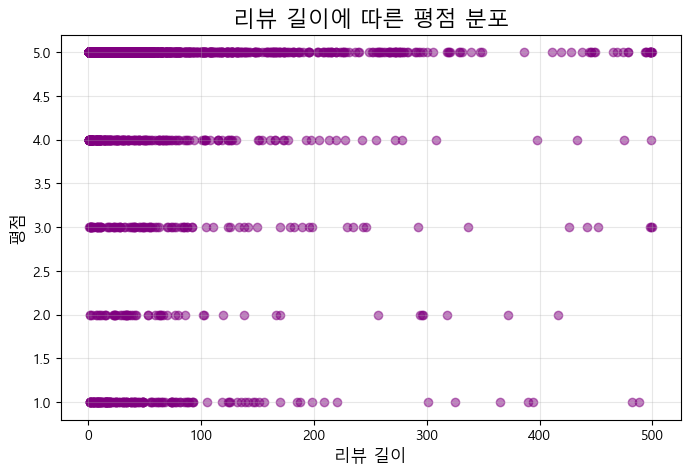

In [18]:
# 5. 리뷰 길이에 따른 평점 분포 - 산점도
plt.figure(figsize=(8, 5))
plt.scatter(df['review_length'], df['score'], alpha=0.5, color='purple')
plt.title('리뷰 길이에 따른 평점 분포', fontsize=16)
plt.xlabel('리뷰 길이', fontsize=12)
plt.ylabel('평점', fontsize=12)
plt.grid(alpha=0.3)
plt.show()